# assignment 1


## initialize


In [3]:
import sqlite3
from sqlite3 import Error

connect = sqlite3.connect('hw1.db')
cursor = connect.cursor()


## create db


In [46]:
def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()


if __name__ == '__main__':
    create_connection(r"hw1.db")


2.6.0


### create tables


In [42]:
tableList = []


createVendor = """
    create table vendor (
    vendorId char(2) not null,
    vendorName varchar(25) not null,
    primary key (vendorId)
    );
    """
tableList.append("vendor")


createCategory = """
    CREATE TABLE category (
    categoryid  CHAR(2)  NOT NULL,
    categoryname  VARCHAR(25)  NOT NULL,
    PRIMARY KEY (categoryid) );
    """
tableList.append('category')

createProduct = """
    CREATE TABLE product
    (productid  CHAR(3)  NOT NULL,
    productname  VARCHAR(25)  NOT NULL,
    productprice  NUMERIC(7,2)  NOT NULL,
    vendorid  CHAR(2)  NOT NULL,
    categoryid  CHAR(2)  NOT NULL,
    PRIMARY KEY (productid),
    FOREIGN KEY (vendorid) REFERENCES vendor(vendorid),
    FOREIGN KEY (categoryid) REFERENCES category(categoryid));
    """
tableList.append('product')

createRegion = """
    CREATE TABLE region
    (  regionid  CHAR(1)  NOT NULL,
    regionname  VARCHAR(25)  NOT NULL,
    PRIMARY KEY (regionid) );
    """
tableList.append('region')

createStore = """
    CREATE TABLE store
    (  storeid  VARCHAR(3)  NOT NULL,
    storezip  CHAR(5)  NOT NULL,
    regionid  CHAR(1)  NOT NULL,
    PRIMARY KEY (storeid),
    FOREIGN KEY (regionid) REFERENCES region(regionid) )
    """
tableList.append('store')

createCustomer = '''
    CREATE TABLE customer
    (  customerid  CHAR(7)  NOT NULL,
    customername  VARCHAR(15)  NOT NULL,
    customerzip  CHAR(5)  NOT NULL,
    PRIMARY KEY (customerid) );
    '''
tableList.append('customer')

createSalesTransaction = '''
    CREATE TABLE salesTransaction
    (  tid  VARCHAR(8)  NOT NULL,
    customerid  CHAR(7)  NOT NULL,
    storeid  VARCHAR(3)  NOT NULL,
    tdate  DATE  NOT NULL,
    PRIMARY KEY (tid),
    FOREIGN KEY (customerid) REFERENCES customer(customerid),
    FOREIGN KEY (storeid) REFERENCES store(storeid) );
    '''
tableList.append('salesTransaction')

createIncludes = '''
    CREATE TABLE includes
    (  productid  CHAR(3)  NOT NULL,
    tid  VARCHAR(8)  NOT NULL,
    quantity  INT  NOT NULL,
    PRIMARY KEY (productid, tid),
    FOREIGN KEY (productid) REFERENCES product(productid),
    FOREIGN KEY (tid) REFERENCES salestransaction(tid) );
    '''
tableList.append('includes')


for x in tableList:
    cursor.execute(f'drop table if exists {x}')

cursor.execute(createVendor)
cursor.execute(createCategory)
cursor.execute(createProduct)
cursor.execute(createRegion)
cursor.execute(createStore)
cursor.execute(createCustomer)
cursor.execute(createSalesTransaction)
cursor.execute(createIncludes)


connect.close()


### insert


In [5]:
connect = sqlite3.connect('hw1.db')

openFile = open(r'insert.txt')

for row in openFile:
    row = str(row)
    cursor.execute(row)

connect.commit()
connect.close()


## queries


### test


#### show tables


In [53]:
connect = sqlite3.connect('hw1.db')

cursor.execute('''
               select name
               from sqlite_master
               where type = "table"
               ''')

tables = cursor.fetchall()


for table in tables:
    print(table)


('vendor',)
('category',)
('product',)
('region',)
('store',)
('customer',)
('salesTransaction',)
('includes',)


In [55]:
cursor.execute('''
               select *
               from vendor
               ''')

records = cursor.fetchall()

for record in records:
    print(record)


[('PG', 'Pacifica Gear'), ('MK', 'Mountain King')]
('PG', 'Pacifica Gear')
('MK', 'Mountain King')


# start of hw


Page 193 (tables are on page 145, Figure 5.1c, or on slides). Please use SQL to create the necessary tables and input data. Then write SQL queries (each question needs a query, please save each query) for E5.1.8, E5.1.9, E5.1.10 (do this one by join), E5.1.10 (do this one again by subquery/nested query), E5.1.14, E5.1.15, E5.1.16, E5.1.20, E5.1.21, E5.1.22, E5.1.11, E5.1.12, E5.1.13, E5.1.17, E5.1.18, E5.1.19, E5.1.23

Note: when you join two or more tables together, if you prefer, you can also use INNER JOIN, (or LEFT JOIN, RIGHT JOIN) format.


schema


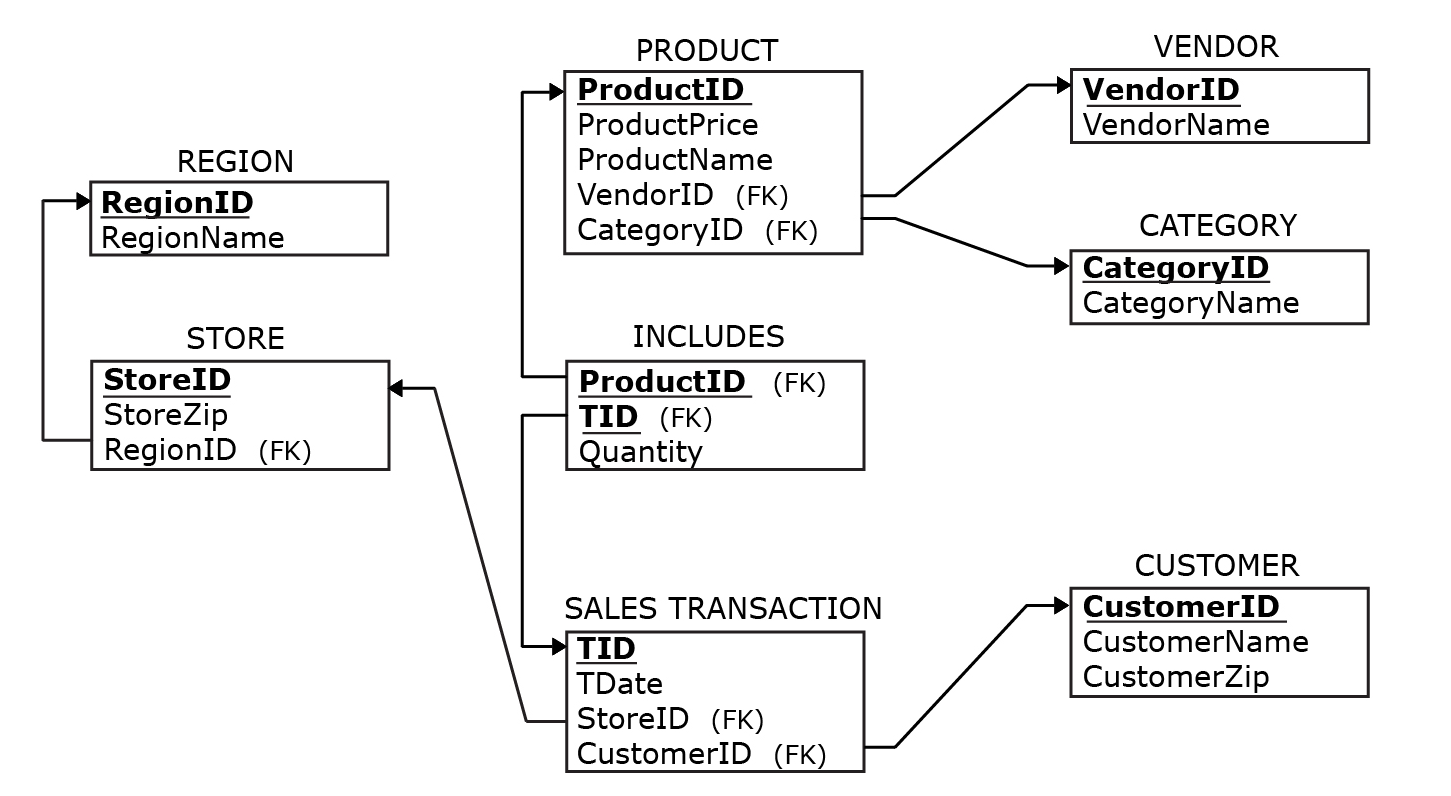

In [3]:
from IPython.display import Image
Image(filename='schema.png')


In [2]:
connect = sqlite3.connect('hw1.db')


NameError: name 'sqlite3' is not defined

E5.1.8 Display the ProductID, ProductName, ProductPrice, and VendorName for all products. Sort the results by ProductID.


In [6]:
cursor.execute('''
               select productid, productname, productprice, vendorname 
               from product as p
                join vendor as v on p.vendorid = v.vendorid
                order by productid
               ''')

records = cursor.fetchall()

for record in records:
    print(record)


('1X1', 'Zzz Bag', 100, 'Pacifica Gear')
('2X2', 'Easy Boot', 70, 'Mountain King')
('3X3', 'Cosy Sock', 15, 'Mountain King')
('4X4', 'Dura Boot', 90, 'Pacifica Gear')
('5X5', 'Tiny Tent', 150, 'Mountain King')
('6X6', 'Biggy Tent', 250, 'Mountain King')


E5.1.9 Display the ProductID, ProductName, ProductPrice, VendorName, and CategoryName for all products. Sort the results by ProductID.


In [65]:
cursor.execute('''
               select productid, productname, productprice, vendorname, categoryname
               from product as p
                join vendor as v on p.vendorid = v.vendorid
                join category as c on p.categoryid = c.categoryid
                order by productid
               ''')

records = cursor.fetchall()

for record in records:
    print(record)


('1X1', 'Zzz Bag', 100, 'Pacifica Gear', 'Camping')
('2X2', 'Easy Boot', 70, 'Mountain King', 'Footwear')
('3X3', 'Cosy Sock', 15, 'Mountain King', 'Footwear')
('4X4', 'Dura Boot', 90, 'Pacifica Gear', 'Footwear')
('5X5', 'Tiny Tent', 150, 'Mountain King', 'Camping')
('6X6', 'Biggy Tent', 250, 'Mountain King', 'Camping')


E5.1.10 Display the ProductID, ProductName, and ProductPrice for products in the category whose CategoryName value is Camping. Sort the results by ProductID. (join)


In [70]:
cursor.execute('''
               select productid, productname, productprice 
               from product as p 
               join category as c on p.categoryid = c.categoryid
               where categoryname = 'Camping'
               order by productid
               ''')

records = cursor.fetchall()

for record in records:
    print(record)


('1X1', 'Zzz Bag', 100)
('5X5', 'Tiny Tent', 150)
('6X6', 'Biggy Tent', 250)


E5.1.10 Display the ProductID, ProductName, and ProductPrice for products in the category whose CategoryName value is Camping. Sort the results by ProductID. (subquery)


In [85]:
cursor.execute('''
               select productid, productname, productprice
               from product 
               where categoryid in (
                   select categoryid
                   from category
                   where categoryname = 'Camping'
               )
               order by productid
               ''')

records = cursor.fetchall()

for record in records:
    print(record)


('1X1', 'Zzz Bag', 100)
('5X5', 'Tiny Tent', 150)
('6X6', 'Biggy Tent', 250)


E.5.1.11 Display the ProductID, ProductName, and ProductPrice for products that were sold in the zip code 60600. Sort the results by ProductID.


In [92]:
cursor.execute('''
               select p.productid, productname, productprice
               from product as p 
               join includes as i on p.productid = i.productid
               join salesTransaction as st on i.tid = st.tid
               join store as s on st.storeid = s.storeid
               where storezip = 60600
               order by p.productid
               ''')

records = cursor.fetchall()

for record in records:
    print(record)


('1X1', 'Zzz Bag', 100)


E.5.1.12 Display the ProductID, ProductName, and ProductPrice for Products whose VendorName is Pacifica Gear that were sold in the region whose RegionName is Tristate. Do not display the same information more than once (i.e., do not show the same product more than once). Sort the results by ProductID.


In [98]:
cursor.execute('''
               select distinct p.productid, productname, productprice 
               from product as p 
               join vendor as v on p.vendorid = v.vendorid
               join includes as i on p.productid = i.productid
               join salesTransaction as st on i.tid = st.tid 
               join store as s on st.storeid = s.storeid
               join region as r on s.regionid = r.regionid
               where regionname = 'Tristate'
               order by p.productid
               ''')

records = cursor.fetchall()

for record in records:
    print(record)


('1X1', 'Zzz Bag', 100)
('2X2', 'Easy Boot', 70)
('3X3', 'Cosy Sock', 15)
('4X4', 'Dura Boot', 90)
('5X5', 'Tiny Tent', 150)
('6X6', 'Biggy Tent', 250)


E5.1.13 Display the TID, CustomerName, and TDate for sales transactions involving a customer buying a product whose ProductName is Easy Boot.


In [102]:
cursor.execute('''
               select st.tid, customerName, tdate 
               from salestransaction as st
               join customer as c on st.customerid = c.customerid
               join includes as i on st.tid = i.tid
               join product as p on i.productid = p.productid
               where productname = 'Easy Boot'
               ''')

records = cursor.fetchall()

for record in records:
    print(record)


('T222', 'Tony', '01/Jan/2020')
('T444', 'Pam', '02/Jan/2020')


E5.1.14 Display the RegionID, RegionName, and number of stores in the region for all regions.


In [106]:
cursor.execute('''
               select r.regionid, regionname, count(storeId)
               from region as r
               join store as s on r.regionId = s.regionId
               group by r.regionid, regionname
               ''')

records = cursor.fetchall()

for record in records:
    print(record)


('C', 'Chicagoland', 2)
('T', 'Tristate', 1)


E5.1.15 For each product category, display the CategoryID, CategoryName, and average price of a product in the category.


In [109]:
cursor.execute('''
               select c.categoryid, categoryname, round(avg(productPrice),2)
               from category as c 
               join product as p on c.categoryid = p.categoryid
               group by c.categoryid, categoryname
               ''')

records = cursor.fetchall()

for record in records:
    print(record)


('CP', 'Camping', 166.67)
('FW', 'Footwear', 58.33)


E5.1.16 For each product category, display the CategoryID and the total number of items purchased in the category.


In [7]:
cursor.execute('''
               select c.categoryId, count(st.tid)
               from category as c
               join product as p on c.categoryId = p.categoryId
               join includes as i on p.productId = i.productId
               join salestransaction as st on i.tid = st.tid
               group by c.categoryid
               ''')

records = cursor.fetchall()

for record in records:
    print(record)


('CP', 4)
('FW', 5)


E5.1.17 Display the RegionID, RegionName, and the total amount of sales (in dollars) in the region for all regions. Display the total amount of sales as AmountSpent.


In [13]:
cursor.execute('''
               select r.regionid, regionname, sum(productPrice)*quantity as AmountSpent
               from region as r 
               join store as s on r.regionid = s.regionid
               join salesTransaction as st on s.storeid = st.storeid
               join includes as i on i.tid = st.tid 
               join product as p on i.productid = p.productid
               group by r.regionid, regionname
               ''')

records = cursor.fetchall()

for record in records:
    print(record)


('C', 'Chicagoland', 170)
('T', 'Tristate', 3825)


E5.1.18 Display the TID and the total number of items (of all products) sold within the transaction for all sales transactions whose total number of items (of all products) sold within the transaction is greater than five.


In [8]:
cursor.execute('''
               select st.tid, count(p.productId)*quantity as Total
               from salesTransaction as st 
               join includes as i on i.tid = st.tid 
               join product as p on p.productid = i.productid
               group by st.tid
               having Total > 5
               ''')

records = cursor.fetchall()

for record in records:
    print(record)


('T333', 10)
('T555', 12)


E5.1.19 For each vendor whose product sales exceed $700, display the VendorID, VendorName, and total amount of sales in dollars. Display the total amount of sales as TotalSales.


In [1]:
cursor.execute('''
               select v.vendorid, vendorname, sum(productPrice*quantity) as TotalSales
               from vendor as v
               join product as p on v.vendorid = p.vendorid
               join includes as i on i.productid = p.productid
               group by v.vendorid, vendorname
               having TotalSales > 700
               ''')

records = cursor.fetchall()

for record in records:
    print(record)


NameError: name 'cursor' is not defined

E5.1.20 Display the ProductID, ProductName, and ProductPrice of the cheapest product.


In [27]:
cursor.execute('''
               select productid, productname, productprice
               from product
               where productprice in (
                   select min(productprice)
                   from product
               )
               ''')

records = cursor.fetchall()

for record in records:
    print(record)


('3X3', 'Cosy Sock', 15)


E5.1.21 Display the ProductID, ProductName, and VendorName for products whose price is below the average price of all products.


In [26]:
cursor.execute('''
               select productid, productname, vendorname 
               from product as p 
               join vendor as v on v.vendorid = p.vendorid
               where productprice < (
                   select avg(productprice)
                   from product
               )
               ''')

records = cursor.fetchall()

for record in records:
    print(record)


('1X1', 'Zzz Bag', 'Pacifica Gear')
('2X2', 'Easy Boot', 'Mountain King')
('3X3', 'Cosy Sock', 'Mountain King')
('4X4', 'Dura Boot', 'Pacifica Gear')


E5.1.22 Display the ProductID and ProductName of the product for the products whose total quantity sold in all transactions is greater than 2. Sort the results by ProductID.


In [25]:
cursor.execute('''
               select p.productid, productname
               from product as p
               join includes as i on i.productid = p.productid
               where quantity > 2
               order by p.productId
               ''')

records = cursor.fetchall()

for record in records:
    print(record)


('3X3', 'Cosy Sock')
('4X4', 'Dura Boot')


E5.1.23 Display the ProductID for the product that has been sold the most within all transactions (i.e., that has been sold in the highest total quantity across all transactions)."


In [24]:
cursor.execute('''
               select p.productId
               from product as p
               join includes as i on i.productId = p.productId
               where quantity in (
                   select max(quantity)
                   from includes
               )
               ''')

records = cursor.fetchall()

for record in records:
    print(record)


('3X3',)
